In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import os
#import umap
import shutil
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [4]:
counter = {'COVID':3616,'Normal':10192}

'''
for image in imgs:
  for count in glob.iglob(ROOT_DIR+image+"*"):
    counter[image] += 1

counter
'''

'\nfor image in imgs:\n  for count in glob.iglob(ROOT_DIR+image+"*"):\n    counter[image] += 1\n\ncounter\n'

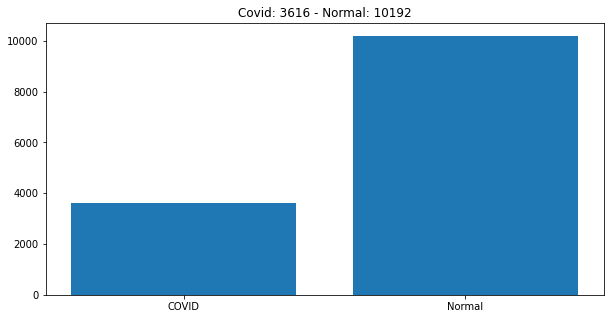

In [5]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.title("Covid: 3616 - Normal: 10192")
plt.show()

In [6]:
train_datagen = image.ImageDataGenerator(rescale=1/255, 
                                         horizontal_flip=True, zoom_range=0.2, 
                                         shear_range=0.2)

In [7]:
train_data = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/Train', 
                                               target_size=(256,256), batch_size=16, 
                                               class_mode='binary')

Found 410 images belonging to 2 classes.


In [8]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
test_datagen = image.ImageDataGenerator(rescale=1/255)

In [10]:
test_data = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/Test', 
                                               target_size=(256,256), batch_size=16,
                                               class_mode='binary')

Found 170 images belonging to 2 classes.


In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [12]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

In [13]:
history = model.fit(train_data, steps_per_epoch=8, epochs=10, 
                    validation_steps=2, 
                    validation_data=test_data)

Epoch 1/10
8/8 [==============================] - 49s 5s/step - loss: 2.6910 - acc: 0.5656 - val_loss: 0.7378 - val_acc: 0.5312
Epoch 2/10
8/8 [==============================] - 27s 4s/step - loss: 0.7515 - acc: 0.4531 - val_loss: 0.6878 - val_acc: 0.9375
Epoch 3/10
8/8 [==============================] - 22s 3s/step - loss: 0.6568 - acc: 0.6875 - val_loss: 0.6336 - val_acc: 0.6562
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 0.6482 - acc: 0.6250 - val_loss: 0.5906 - val_acc: 0.6250
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.6127 - acc: 0.6328 - val_loss: 0.4053 - val_acc: 0.7188
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.5201 - acc: 0.6557 - val_loss: 0.5303 - val_acc: 0.5312
Epoch 7/10
8/8 [==============================] - 4s 572ms/step - loss: 0.4628 - acc: 0.6967 - val_loss: 0.5130 - val_acc: 0.6562
Epoch 8/10
8/8 [==============================] - 4s 477ms/step - loss: 0.5462 - acc: 0.7377 - val_loss:

In [14]:
h = history.history
h.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

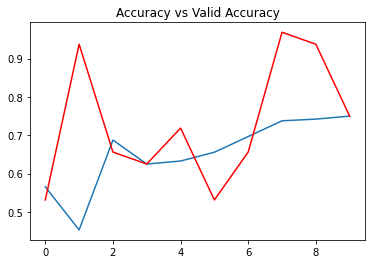

In [15]:
plt.plot(h['acc'])
plt.plot(h['val_acc'] , c = "red")
plt.title("Accuracy vs Valid Accuracy")
plt.show()

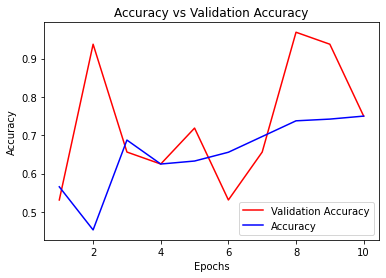

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

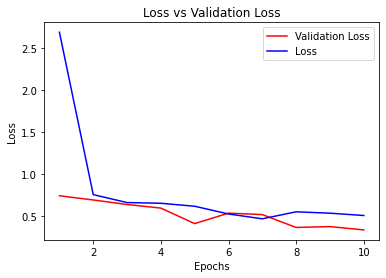

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

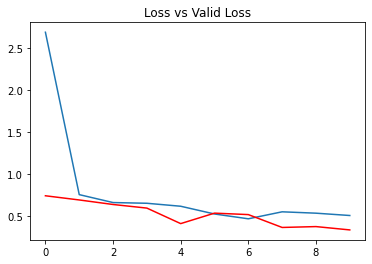

In [18]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("Loss vs Valid Loss")
plt.show()

In [19]:
predictions = model.predict(test_data, steps=8)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

8/8 [==============================] - 2s 212ms/step


In [20]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
true_classes = test_data.classes[:128]
class_labels = list(test_data.class_indices.keys())  

In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(true_classes, predicted_classes))

[[70  0]
 [58  0]]


In [23]:
class_labels

['Covid', 'Normal']

In [24]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes)
print(report)   

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        70
           1       0.00      0.00      0.00        58

    accuracy                           0.55       128
   macro avg       0.27      0.50      0.35       128
weighted avg       0.30      0.55      0.39       128



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
